In [130]:
from numpy import zeros, exp, pi,linspace,sin,cos,real,floor, imag,arange,kaiser,hamming,ones,loadtxt
from pylab import plot, show,xlim,xlabel,ylabel,scatter,loglog,legend
from numpy.fft import rfft,irfft

ImportError: cannot import name 'logplot'

Exercise 7.1

In [3]:
def dft(y):
    N=len(y)
    
    c=zeros(N//2+1,complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k]+=y[n]*exp(-2j*pi*k*n/N)
    return c

In [115]:
# Setting up the square wave. Not happy with how Prof. Newman wants this done, but whatevs
N=1000
y=ones(N,float) #set up with ones or zeros, doesn't really matter
for i in range (N//2,N):
    y[i]=0. #take half of the array and set equal to zero
    


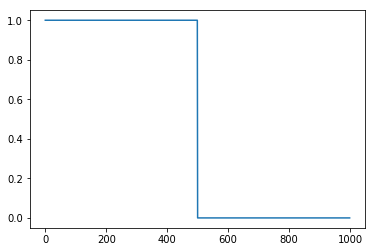

In [116]:
#make sure I didn't make a mistake
plot(y)
show()

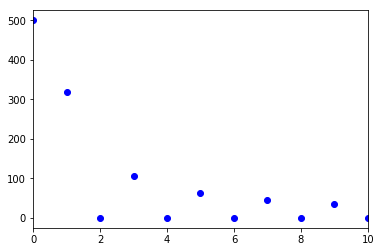

In [117]:
#do the dft and plot. Notice only the odd numbers contribute. This is b/c we created an odd
#function
fft=dft(y)
plot(abs(fft),"bo")
xlim(0,10)
show()

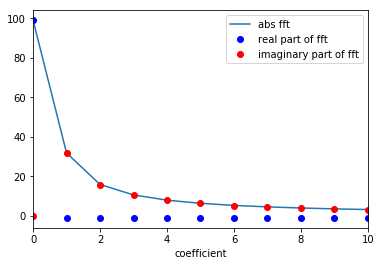

In [121]:
#make a stupid straight line like asked
for i in range(N):
    y[i]=i
fft=dft(t)
plot(abs(fft),label="abs fft")
plot(fft.real,"bo",label="real part of fft")
plot(fft.imag,"ro", label="imaginary part of fft")
xlim(0,10)
xlabel("coefficient")
legend()
show()
# Notice this has both even and odd components.

In [122]:
#make a modulated function
for i in range(N):
    y[i]=sin(pi*i/N)*sin(20*pi*i/N)

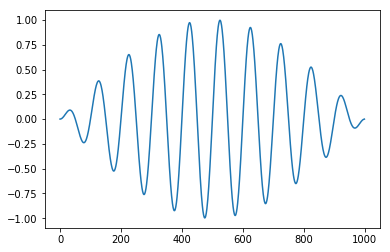

In [123]:
#check
plot(y)
show()

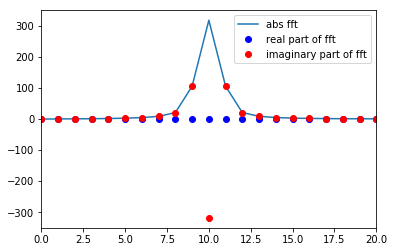

In [125]:
fft=dft(y)
plot(abs(fft),label="abs fft")
plot(fft.real,"bo",label="real part of fft")
plot(fft.imag,"ro", label="imaginary part of fft")
xlim(0,20)
legend()
show()

# 7.2 (Forgot I didn't assign it, so a freebie)

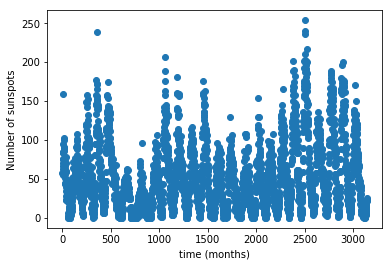

In [129]:
data=loadtxt("sunspots.txt",float) # load sunspots data
x=data[:,0]#we're told that the first column is the "date" in months
y=data[:,1]#number of sunspots in second column
scatter(x,y) #plot as a scatter plot with red stars, b/c why not?
                                #see https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html for details
xlabel("time (months)")
ylabel("Number of sunspots")

show()

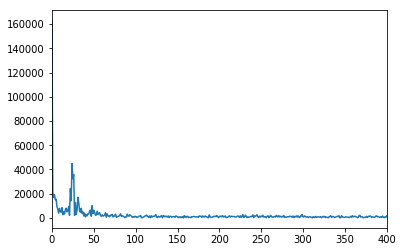

In [133]:
fft=dft(y)


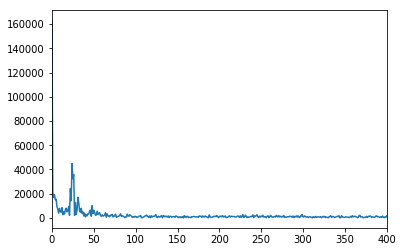

In [134]:
plot((abs(fft)))# hey look a big spike
xlim(0,400)
show()

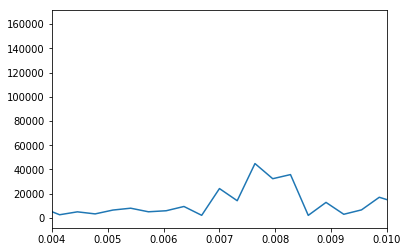

In [143]:
# this is stupid. I can't take it anymore. Let's plot this against a real frequency axis
fs=1/(x[1]-x[0]) #this is the sampling frequency from the data or 1/1month
f=linspace(0,fs/2,len(x)//2+1)
plot(f,abs(fft))
xlim(0.004,.01)#zoom in
show()
# hey, look a peak at rounghly 0.0075months^-1 or a period of 11.1 years, which is the
# accepted sunspot cycle.

# Exercise 7.4

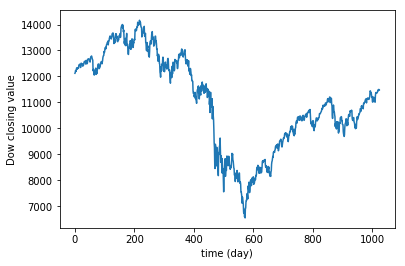

In [146]:
data=loadtxt("dow.txt",float) # load dow data

plot(data) 
xlabel("time (day)")
ylabel("Dow closing value")

show()

In [147]:
dow_fft=rfft(data) # taking too long with dft. rfft only gives half the coeff. b/c we said
                    #data was real

In [148]:
for i in range(len(dow_fft)//10,len(dow_fft)): #last 90% of fft data set to zero. Low-pass filter
    dow_fft[i]=0

In [149]:
filtered=irfft(dow_fft) #flip back

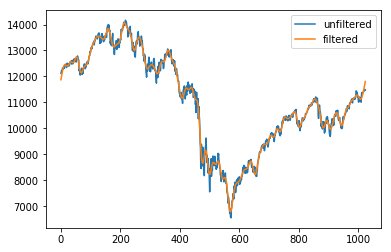

In [150]:
plot(data,label="unfiltered")
plot(filtered,label="filtered")
legend()
show()

In [104]:
for i in range(len(dow_fft)//98,len(dow_fft)): #stronger filter. only keep first 2%
    dow_fft[i]=0

In [105]:
filtered2=irfft(dow_fft) #go back

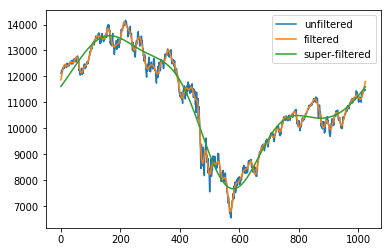

In [152]:
plot(data,label="unfiltered")
plot(filtered, label="filtered")
plot(filtered2,label="super-filtered")
legend()
show()